### Binary Classification on UCI Mushroom Dataset
### Edible or Poisonous?

In [12]:
import numpy as np

import datetime
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # to disable GPU

In [13]:
def Analyze_training(h):
# summarize history for accuracy
   plt.plot(h.history['accuracy'])
   plt.plot(h.history['val_accuracy'])
   plt.title('model accuracy')
   plt.ylabel('accuracy')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
# summarize history for loss
   plt.plot(h.history['loss'])
   plt.plot(h.history['val_loss'])
   plt.title('model loss')
   plt.ylabel('loss')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
   return

#### Read Dataset

In [14]:
df = pd.read_csv('./DAL_workshop_datasets/mushrooms.csv')
df.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


Neural Networks don't understand letters. We need to encode them

In [15]:
# Quick way to encode whole dataframe
df_enc = df.apply(LabelEncoder().fit_transform)
# everything is encoded now
data = df_enc.values  # data is an array. Keras likes arrays
headers = list(df.columns.values) #store features of mushrooms
print(data.shape, type(data))
print(data)

(8124, 23) <class 'numpy.ndarray'>
[[1 5 2 ... 2 3 5]
 [0 5 2 ... 3 2 1]
 [0 0 2 ... 3 2 3]
 ...
 [0 2 2 ... 0 1 2]
 [1 3 3 ... 7 4 2]
 [0 5 2 ... 4 1 2]]


Split and prepare y (objective) is in column 1

In [16]:
split = int(0.90 * data.shape[0])

x_train = data[:split , 1:]
y_train = data[:split, 0]

x_test = data[split: , 1:]
y_test = data[split: , 0]

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(7311, 22) (7311,)
(813, 22) (813,)


Let's define the network

In [18]:
model = Sequential()
model.add(Dense(11, input_shape=(22,),activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
adam_defined = Adam(learning_rate=0.0005)

model.summary()
model.compile(loss='binary_crossentropy', optimizer=adam_defined, metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 11)                253       
                                                                 
 dense_9 (Dense)             (None, 64)                768       
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,550
Trainable params: 1,550
Non-trainable params: 0
_________________________________________________________________


train

In [19]:
hist = model.fit(x_train, y_train, epochs=15, shuffle=True,batch_size=10,validation_data=(x_test, y_test))

Epoch 1/15
732/732 [==============================] - 1s 1ms/step - loss: 0.4147 - accuracy: 0.8173 - val_loss: 0.1883 - val_accuracy: 0.9360
Epoch 2/15
732/732 [==============================] - 1s 1ms/step - loss: 0.2041 - accuracy: 0.9205 - val_loss: 0.1965 - val_accuracy: 0.9323
Epoch 3/15
732/732 [==============================] - 1s 1ms/step - loss: 0.1406 - accuracy: 0.9465 - val_loss: 0.1846 - val_accuracy: 0.9520
Epoch 4/15
732/732 [==============================] - 1s 1ms/step - loss: 0.1059 - accuracy: 0.9625 - val_loss: 0.2055 - val_accuracy: 0.9508
Epoch 5/15
732/732 [==============================] - 1s 1ms/step - loss: 0.0841 - accuracy: 0.9714 - val_loss: 0.1906 - val_accuracy: 0.9569
Epoch 6/15
732/732 [==============================] - 1s 1ms/step - loss: 0.0637 - accuracy: 0.9809 - val_loss: 0.1991 - val_accuracy: 0.9545
Epoch 7/15
732/732 [==============================] - 1s 1ms/step - loss: 0.0509 - accuracy: 0.9841 - val_loss: 0.1974 - val_accuracy: 0.9496
Epoch 

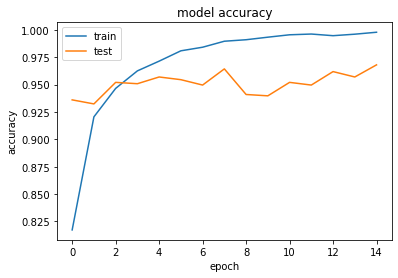

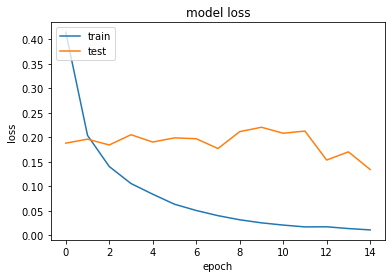

In [20]:
Analyze_training(hist)

In [ ]:
#EOF